# Importing necessary liabraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading dataset

In [4]:
og = pd.read_csv('apps.csv')
np.random.seed(0)

In [5]:
data=og.copy()

# EDA

In [7]:
data.head()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
data.tail()

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9658,10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19.0,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [9]:
data.shape

(9659, 14)

Checking for NaN Values

In [11]:
print(data.isna().sum())

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64


Dealing with NaN values

In [13]:
data['Rating'] = data['Rating'].fillna(int(data['Rating'].mean()))

In [14]:
data['Size'] = data['Size'].fillna(data['Size'].mode()[0])

In [15]:
data = data.dropna()

In [16]:
print(data.isna().sum())

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64


In [17]:
print(data.duplicated().sum())

0


In [18]:
data.shape

(9649, 14)

In [19]:
nh = data['Category'].unique()
nh.sort
print(nh)

['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION']


# Metric analysis

Most Category of App Used

In [22]:
print(data['Category'].value_counts())

Category
FAMILY                 1829
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PRODUCTIVITY            374
PERSONALIZATION         374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: count, dtype: int64


In [23]:
pd.set_option('display.max_rows', None)
Genres = data['Genres'].value_counts()
print(Genres)

Genres
Tools                                    824
Entertainment                            560
Education                                509
Business                                 420
Medical                                  395
Productivity                             374
Personalization                          374
Lifestyle                                368
Finance                                  345
Sports                                   331
Communication                            315
Action                                   299
Health & Fitness                         288
Photography                              281
News & Magazines                         254
Social                                   239
Books & Reference                        221
Travel & Local                           218
Shopping                                 202
Simulation                               193
Arcade                                   184
Dating                                   171
Cas

# Visualisation

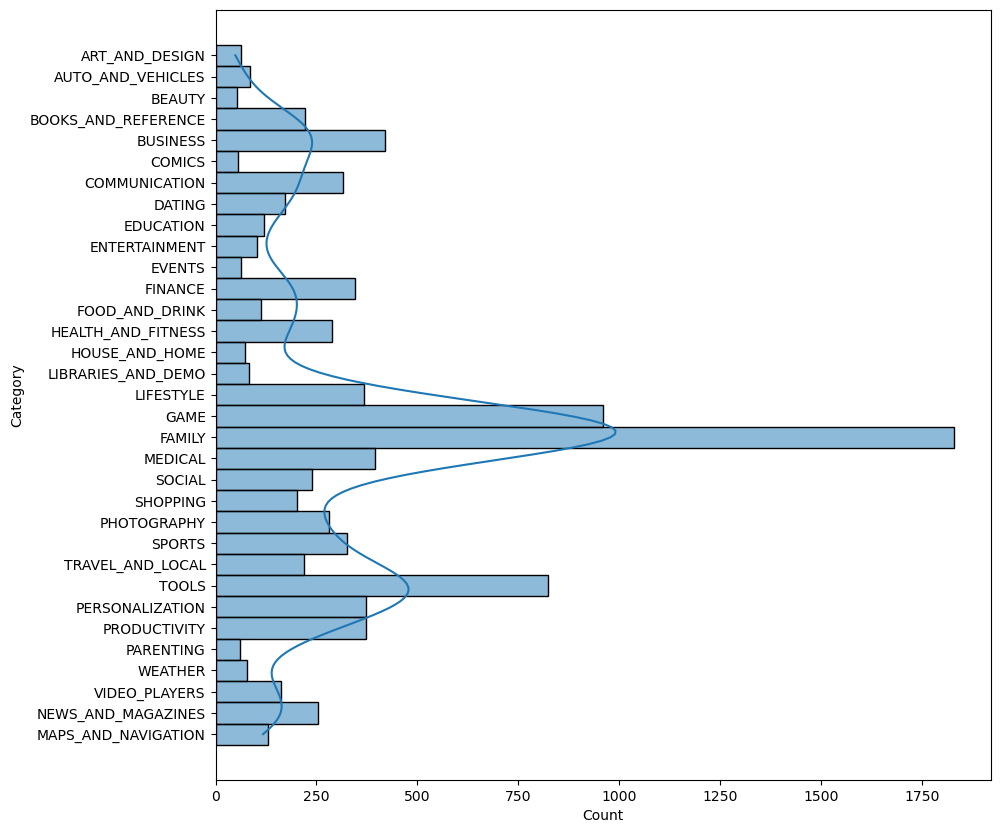

In [25]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data,y='Category',kde=True, legend=False)
plt.show()

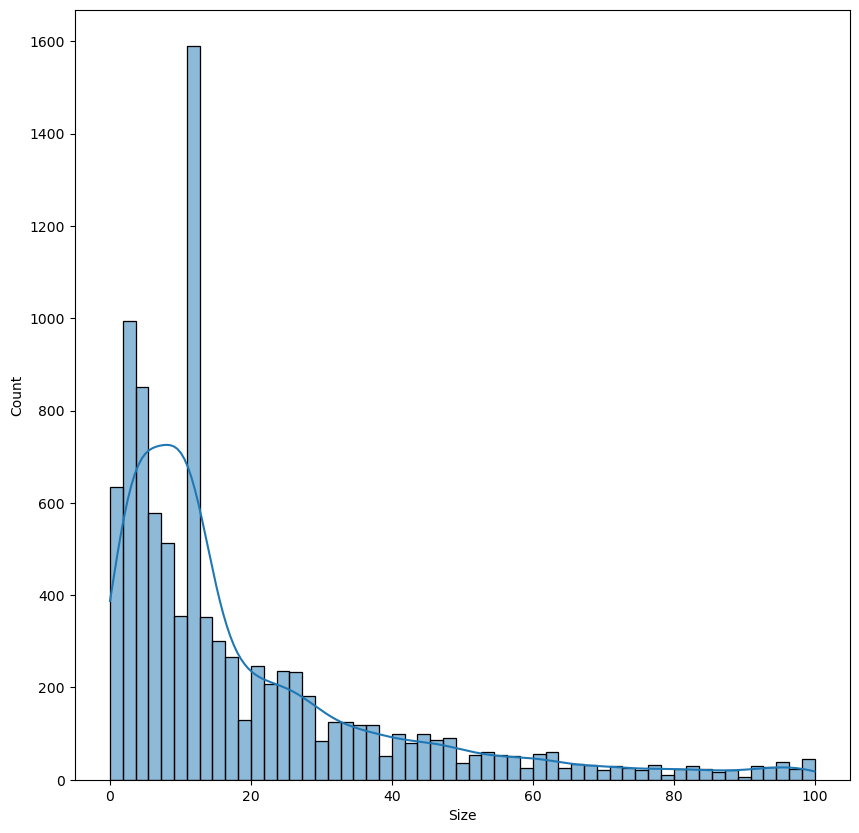

In [26]:
plt.figure(figsize=(10, 10))
sns.histplot(data=data,x='Size',kde=True, legend=False)
plt.show()

Price By Categories

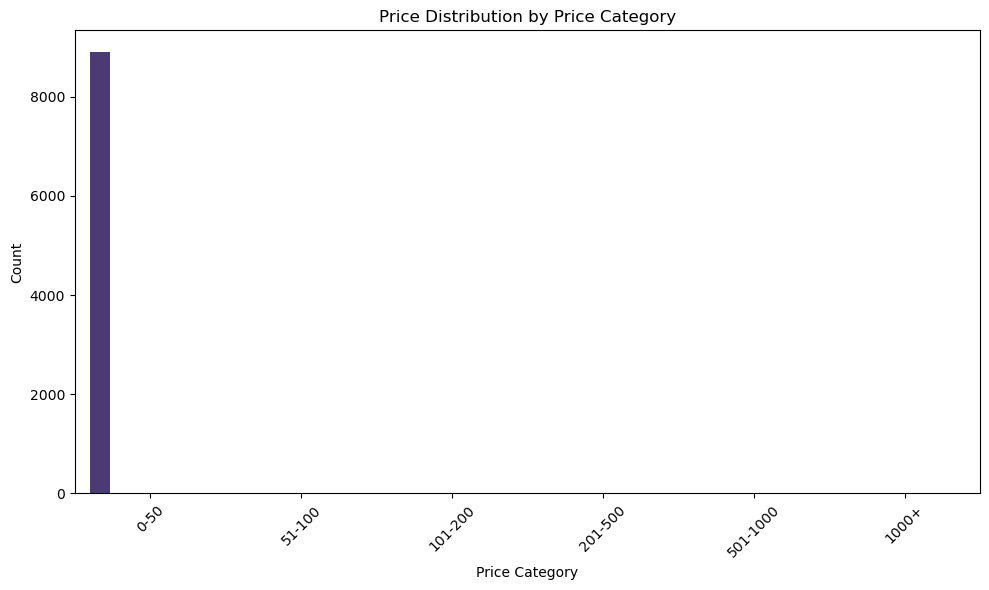

In [28]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data = data.dropna(subset=['Price'])
bins = [0, 50, 100, 200, 500, 1000, float('inf')]  # Adjust these ranges as needed
labels = ['0-50', '51-100', '101-200', '201-500', '501-1000', '1000+']
data.loc[:, 'Price_Category'] = pd.cut(data['Price'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Price_Category', palette='viridis', hue='Price_Category', legend=False)

plt.title('Price Distribution by Price Category')
plt.xlabel('Price Category')
plt.ylabel('Count')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

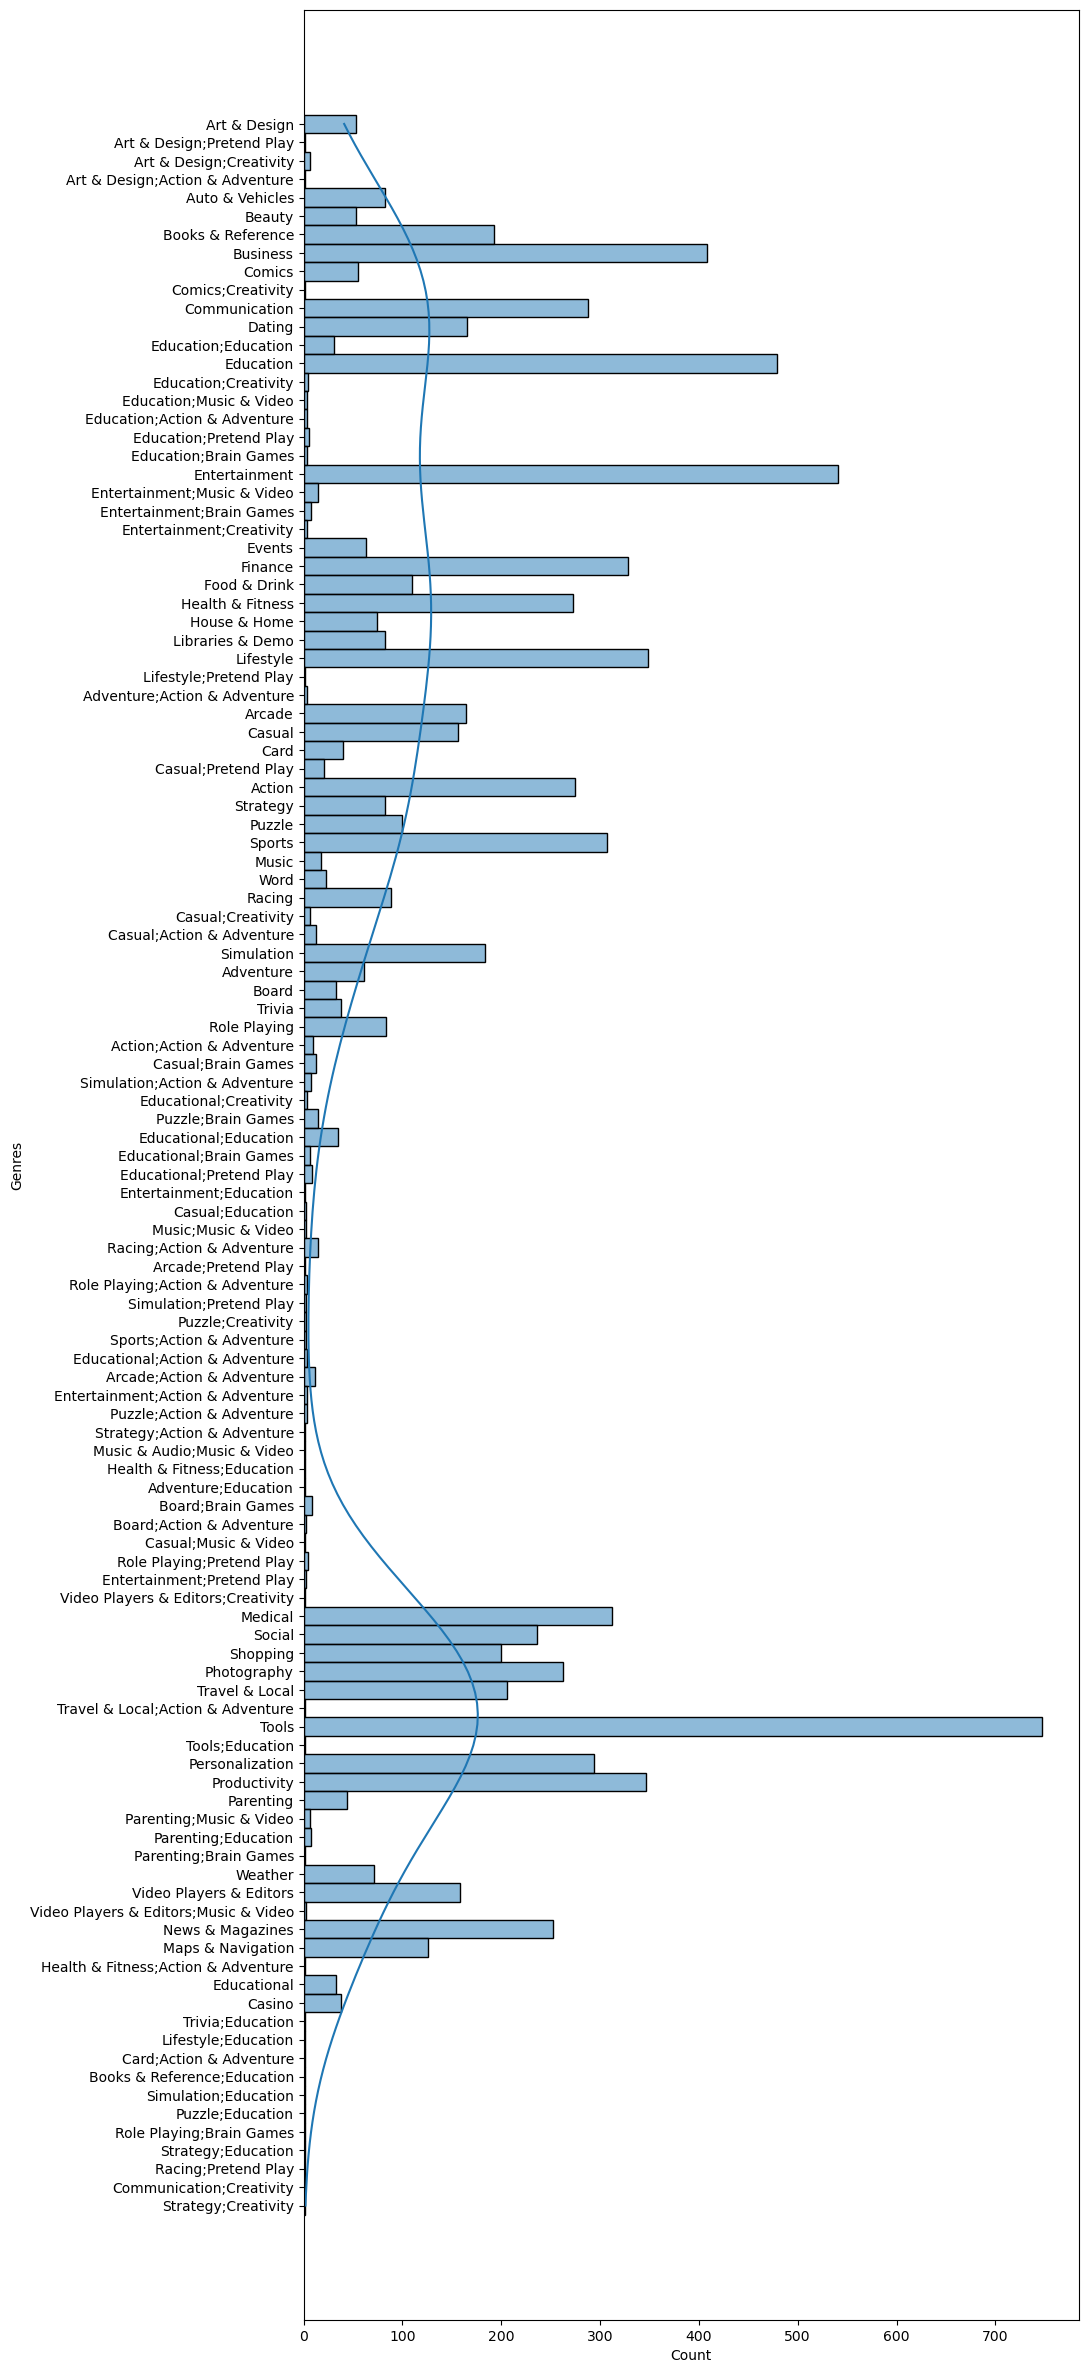

In [29]:
plt.figure(figsize=(10, 30))
sns.histplot(data=data,y='Genres',kde=True, legend=False)
plt.show()

# Adding User Review Dataset

In [31]:
og2 = pd.read_csv('user_reviews.csv')
np.random.seed(0)

In [32]:
data2 = og2.copy()

In [33]:
df1_apps = data[['App']]  
df2_apps = data2[['App']] 

# Create a new DataFrame 
combined_apps = pd.DataFrame({
    'App_from_data': df1_apps['App'],  
    'App_from_data2': df2_apps['App']  
})

print(combined_apps.head())

                                       App_from_data         App_from_data2
0     Photo Editor & Candy Camera & Grid & ScrapBook  10 Best Foods for You
1                                Coloring book moana  10 Best Foods for You
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  10 Best Foods for You
3                              Sketch - Draw & Paint  10 Best Foods for You
4              Pixel Draw - Number Art Coloring Book  10 Best Foods for You


In [34]:
print(combined_apps.tail())

      App_from_data               App_from_data2
64290           NaN  Houzz Interior Design Ideas
64291           NaN  Houzz Interior Design Ideas
64292           NaN  Houzz Interior Design Ideas
64293           NaN  Houzz Interior Design Ideas
64294           NaN  Houzz Interior Design Ideas


In [35]:
common_apps = combined_apps[combined_apps['App_from_data'] == combined_apps['App_from_data2']]
print(common_apps)

     App_from_data App_from_data2
1377   8 Ball Pool    8 Ball Pool


# There is only one common app from the 2 dataset

# Sentiment Analysis of 8 Ball Pool

In [38]:
filtered_df = data2[data2['App'] == '8 Ball Pool']
print(filtered_df)

              App                                  Translated_Review  \
1258  8 Ball Pool                                                NaN   
1259  8 Ball Pool                                                NaN   
1260  8 Ball Pool                                                NaN   
1261  8 Ball Pool                                                NaN   
1262  8 Ball Pool  The better pool game Google Play slightly bugg...   
1263  8 Ball Pool  Hate get cue pieces maxed cue. Really wish guy...   
1264  8 Ball Pool  Games alright, bit sketchy either opponent bad...   
1265  8 Ball Pool  Hi really like game. I tried ti purchase hallo...   
1266  8 Ball Pool                                                NaN   
1267  8 Ball Pool                                                NaN   
1268  8 Ball Pool                                                NaN   
1269  8 Ball Pool                                                NaN   
1270  8 Ball Pool                                               

In [39]:
data_new = filtered_df.dropna()
print(data_new)

              App                                  Translated_Review  \
1262  8 Ball Pool  The better pool game Google Play slightly bugg...   
1263  8 Ball Pool  Hate get cue pieces maxed cue. Really wish guy...   
1264  8 Ball Pool  Games alright, bit sketchy either opponent bad...   
1265  8 Ball Pool  Hi really like game. I tried ti purchase hallo...   
1273  8 Ball Pool  Worst servers Iran... From first time I tried ...   
1275  8 Ball Pool  I previous profile however updates I lost 1.5 ...   
1283  8 Ball Pool  Love game I'm issues requesting gifts club adv...   
1284  8 Ball Pool  So wanted enjoy game hacked death many people ...   
1297  8 Ball Pool  Really love I wish like real pool. If sink str...   
1310  8 Ball Pool  Really! What I think game awesome, I play tabl...   
1320  8 Ball Pool  Sorry greedy! I love game since I started Now ...   
1325  8 Ball Pool  Really good addictive game. Me girlfriend cons...   
1326  8 Ball Pool  Game cuts sometimes u loose turn sometimes ca

In [40]:
data_new = data_new.drop(columns=['Sentiment_Polarity'])
print(data_new)

              App                                  Translated_Review  \
1262  8 Ball Pool  The better pool game Google Play slightly bugg...   
1263  8 Ball Pool  Hate get cue pieces maxed cue. Really wish guy...   
1264  8 Ball Pool  Games alright, bit sketchy either opponent bad...   
1265  8 Ball Pool  Hi really like game. I tried ti purchase hallo...   
1273  8 Ball Pool  Worst servers Iran... From first time I tried ...   
1275  8 Ball Pool  I previous profile however updates I lost 1.5 ...   
1283  8 Ball Pool  Love game I'm issues requesting gifts club adv...   
1284  8 Ball Pool  So wanted enjoy game hacked death many people ...   
1297  8 Ball Pool  Really love I wish like real pool. If sink str...   
1310  8 Ball Pool  Really! What I think game awesome, I play tabl...   
1320  8 Ball Pool  Sorry greedy! I love game since I started Now ...   
1325  8 Ball Pool  Really good addictive game. Me girlfriend cons...   
1326  8 Ball Pool  Game cuts sometimes u loose turn sometimes ca

In [41]:
data_new = data_new.drop(columns=['Sentiment_Subjectivity'])
print(data_new)

              App                                  Translated_Review Sentiment
1262  8 Ball Pool  The better pool game Google Play slightly bugg...  Negative
1263  8 Ball Pool  Hate get cue pieces maxed cue. Really wish guy...  Negative
1264  8 Ball Pool  Games alright, bit sketchy either opponent bad...  Negative
1265  8 Ball Pool  Hi really like game. I tried ti purchase hallo...  Negative
1273  8 Ball Pool  Worst servers Iran... From first time I tried ...  Positive
1275  8 Ball Pool  I previous profile however updates I lost 1.5 ...  Negative
1283  8 Ball Pool  Love game I'm issues requesting gifts club adv...  Positive
1284  8 Ball Pool  So wanted enjoy game hacked death many people ...  Negative
1297  8 Ball Pool  Really love I wish like real pool. If sink str...  Positive
1310  8 Ball Pool  Really! What I think game awesome, I play tabl...  Positive
1320  8 Ball Pool  Sorry greedy! I love game since I started Now ...  Negative
1325  8 Ball Pool  Really good addictive game. Me gi

In [42]:
print(data_new['Sentiment'].value_counts())

Sentiment
Negative    106
Positive    104
Neutral       9
Name: count, dtype: int64


In [43]:
total = data_new['Sentiment'].count()
print(total)

219


In [44]:
pos = data_new[data_new['Sentiment']=='Positive'].count() / 219 * 100
print(pos['Sentiment'])

47.48858447488584


In [45]:
neg = data_new[data_new['Sentiment']=='Negative'].count() / 219 * 100
print(neg['Sentiment'])

48.401826484018265


In [46]:
neu = data_new[data_new['Sentiment']=='Neutral'].count() / 219 *100
print(neu['Sentiment'])

4.10958904109589


# Positive Review Percentage - 47.49

# Negative Review Percentage - 48.40

# Neutral Review Percentage - 4.1

# Sentiment analysis by Naive Bayes

In [49]:
data_new = data_new.drop(columns=['Sentiment'])
print(data_new)

              App                                  Translated_Review
1262  8 Ball Pool  The better pool game Google Play slightly bugg...
1263  8 Ball Pool  Hate get cue pieces maxed cue. Really wish guy...
1264  8 Ball Pool  Games alright, bit sketchy either opponent bad...
1265  8 Ball Pool  Hi really like game. I tried ti purchase hallo...
1273  8 Ball Pool  Worst servers Iran... From first time I tried ...
1275  8 Ball Pool  I previous profile however updates I lost 1.5 ...
1283  8 Ball Pool  Love game I'm issues requesting gifts club adv...
1284  8 Ball Pool  So wanted enjoy game hacked death many people ...
1297  8 Ball Pool  Really love I wish like real pool. If sink str...
1310  8 Ball Pool  Really! What I think game awesome, I play tabl...
1320  8 Ball Pool  Sorry greedy! I love game since I started Now ...
1325  8 Ball Pool  Really good addictive game. Me girlfriend cons...
1326  8 Ball Pool  Game cuts sometimes u loose turn sometimes cau...
1327  8 Ball Pool  I actually addi

In [50]:
data_new = data_new.reset_index(drop=True)

In [51]:
print(data_new.index)

RangeIndex(start=0, stop=219, step=1)


In [52]:
data_new.shape

(219, 2)

In [53]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

# Download stopwords from nltk
nltk.download('stopwords')

corpus = []

# Loop through your dataset (assuming data_new is your dataframe)
for i in range(0, 219):  # Make sure the range corresponds to your actual dataset size
    review = re.sub('[^a-zA-Z]', ' ', data_new['Translated_Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    
    # Load the stopwords, remove 'not' from the list
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')  # 'not' is important for sentiment analysis, so we keep it
    
    # Apply stemming and remove stopwords
    review = [ps.stem(word) for word in review if word not in set(all_stopwords)]
    
    # Join the processed words back into a single string
    review = ' '.join(review)
    
    # Append the cleaned review to the corpus
    corpus.append(review)

# Feature extraction using CountVectorizer
cv = CountVectorizer(max_features=795)
X = cv.fit_transform(corpus).toarray()

# Assuming Y is your target variable from your dataframe
Y = data_new.iloc[:, -1].values  # Use 'data_new' since you're referencing it in the loop


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Step 1: Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Step 2: Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, Y_train)

# Step 3: Predict on the test set
Y_pred = nb.predict(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(conf_matrix)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 3]]


In [56]:
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.73%
